In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()

# Goal is to model that predict how likely a student is to pass their high school final exam. 

    school - student's school (binary: "GP" or "MS")
    sex - student's sex (binary: "F" - female or "M" - male)
    age - student's age (numeric: from 15 to 22)
    address - student's home address type (binary: "U" - urban or "R" - rural)
    famsize - family size (binary: "LE3" - less or equal to 3 or "GT3" - greater than 3)
    Pstatus - parent's cohabitation status (binary: "T" - living together or "A" - apart)
    Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
    Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
    Mjob - mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
    Fjob - father's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
    reason - reason to choose this school (nominal: close to "home", school "reputation", "course" preference or "other")
    guardian - student's guardian (nominal: "mother", "father" or "other")
    traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
    studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
    failures - number of past class failures (numeric: n if 1<=n<3, else 4)
    schoolsup - extra educational support (binary: yes or no)
    famsup - family educational support (binary: yes or no)
    paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
    activities - extra-curricular activities (binary: yes or no)
    nursery - attended nursery school (binary: yes or no)
    higher - wants to take higher education (binary: yes or no)
    internet - Internet access at home (binary: yes or no)
    romantic - with a romantic relationship (binary: yes or no)
    famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
    freetime - free time after school (numeric: from 1 - very low to 5 - very high)
    goout - going out with friends (numeric: from 1 - very low to 5 - very high)
    Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
    Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
    health - current health status (numeric: from 1 - very bad to 5 - very good)
    absences - number of school absences (numeric: from 0 to 93)
    passed - did the student pass the final exam (binary: yes or no)


# Step 1 – collecting data, exploring and preparing the data

In [2]:
input_data= pd.read_csv("C:/Users/hag5kor/Desktop/Shanu/ATI/Logistic_Regression/student-data.csv")

In [3]:
input_data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'passed'],
      dtype='object')

In [4]:
input_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes


In [5]:
input_data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000


In [6]:
# check Null values in each column
input_data.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
passed        0
dtype: int64

The data looks clean. So we can start with the analysis.

# Exploration of each variable

In [7]:
input_data['passed'].value_counts()

yes    265
no     130
Name: passed, dtype: int64

In [8]:
input_data.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
passed        object
dtype: object

In [28]:
#bar graph for catogorical variables

passed   no  yes
school          
GP      113  236
MS       17   29
passed   no  yes
famsize         
GT3      96  185
LE3      34   80


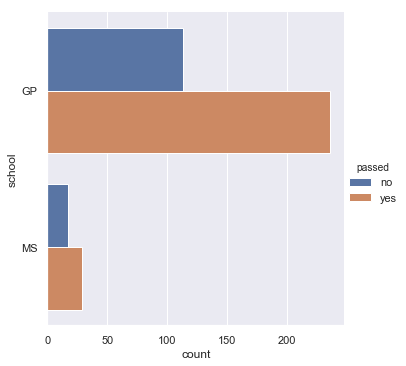

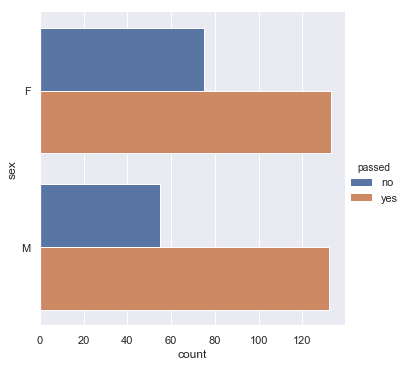

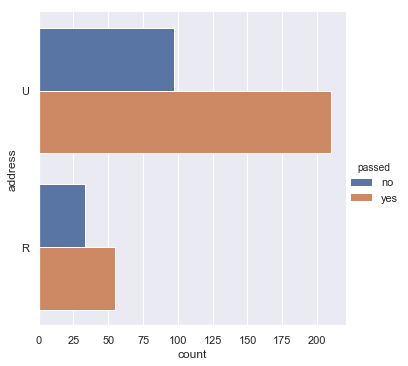

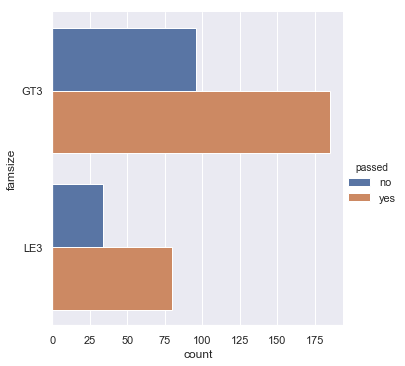

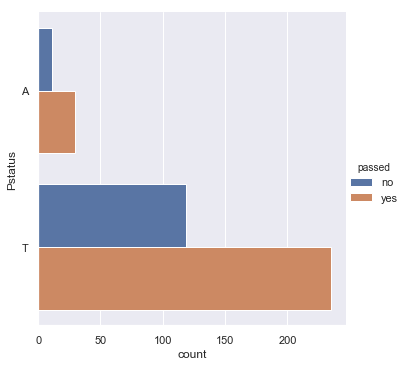

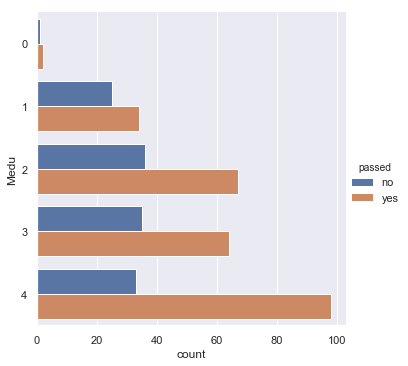

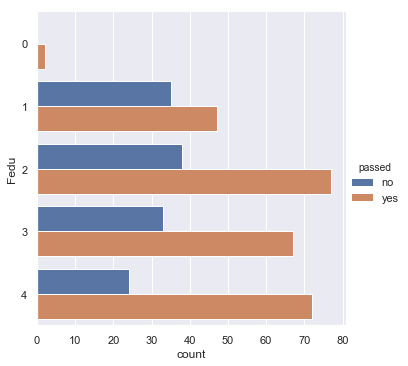

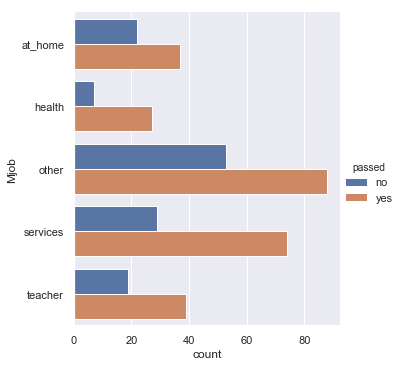

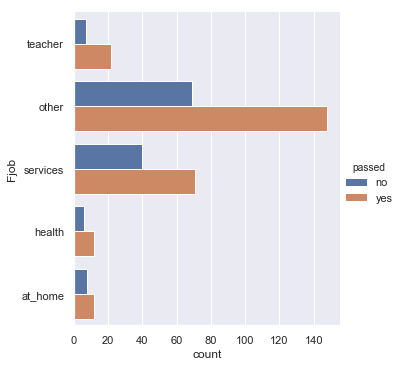

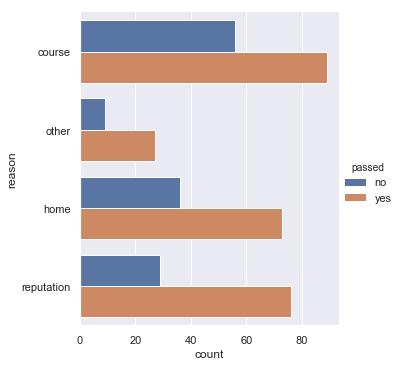

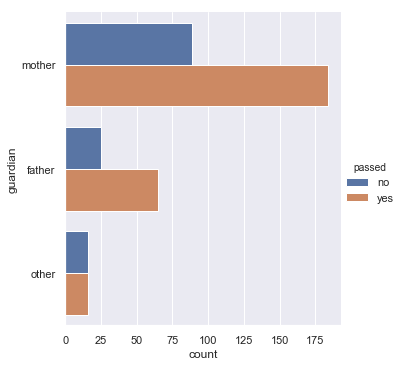

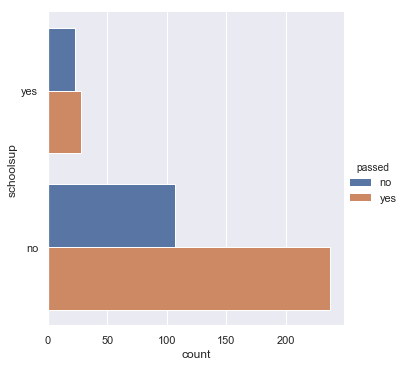

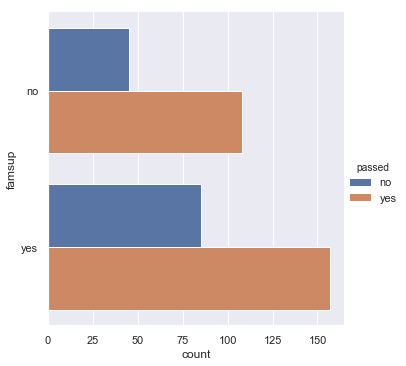

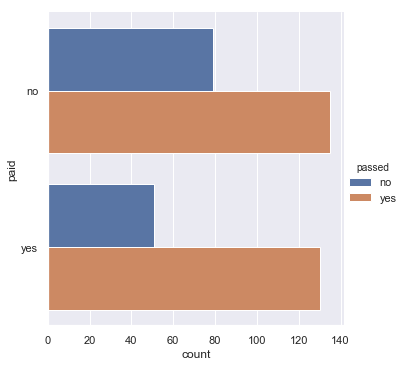

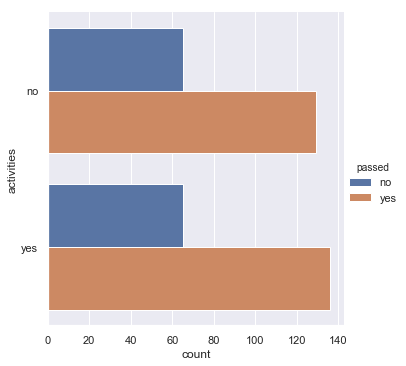

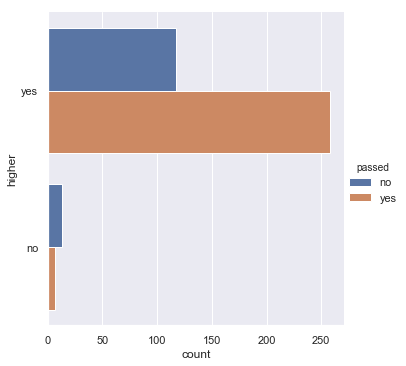

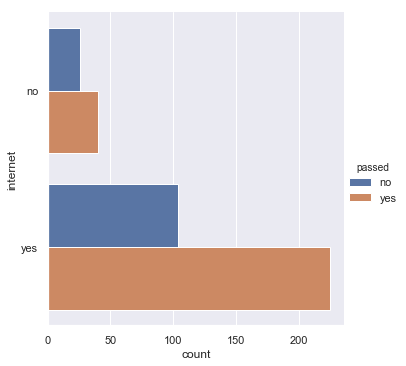

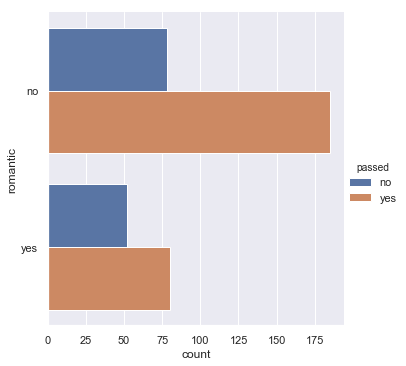

In [30]:
sns.catplot(y='school', kind="count",hue='passed', data=input_data);
print(pd.crosstab(input_data['school'], input_data['passed']))
sns.catplot(y='sex', kind="count",hue='passed', data=input_data);
sns.catplot(y='address', kind="count",hue='passed', data=input_data);
sns.catplot(y='famsize', kind="count",hue='passed', data=input_data);
print(pd.crosstab(input_data['famsize'], input_data['passed']))
sns.catplot(y='Pstatus', kind="count",hue='passed', data=input_data);
sns.catplot(y='Medu', kind="count",hue='passed', data=input_data);
sns.catplot(y='Fedu', kind="count",hue='passed', data=input_data);
sns.catplot(y='Mjob', kind="count",hue='passed', data=input_data);
sns.catplot(y='Fjob', kind="count",hue='passed', data=input_data);
sns.catplot(y='reason', kind="count",hue='passed', data=input_data);
sns.catplot(y='guardian', kind="count",hue='passed', data=input_data);
sns.catplot(y='schoolsup', kind="count",hue='passed', data=input_data);
sns.catplot(y='famsup', kind="count",hue='passed', data=input_data);
sns.catplot(y='paid', kind="count",hue='passed', data=input_data);
sns.catplot(y='activities', kind="count",hue='passed', data=input_data);
sns.catplot(y='higher', kind="count",hue='passed', data=input_data);
sns.catplot(y='internet', kind="count",hue='passed', data=input_data);
sns.catplot(y='romantic', kind="count",hue='passed', data=input_data);

In [ ]:
#school: student from 'GP' are more likely to pass the exam, but not very strong predictor for passed.
#sex: male student are more likely to pass the exam.
#address: There is no difference in performance of students whether he belong to urban or rural
#famsize: There is no difference in performance of students whether there family size is less than 3 or greater than 3
#Pstatus: There is no difference in performance of students whether his parents stays together or apart
#Medu : mother education is important for student education
#Fedu : father education is also important for student education
#Mjob : Mother job is not very important for student education
#Fjob : father job is important for student education, failing only when at_home , can reduce number of categories
#reason is not very important
#If the gurdian is other, student passed 50% chance., it is important
# If students are taking extra class, means they will fail. schoolsup is important
#famsup: family educational support doesn't seem very important
#paid is important
#activities not important
#higher is important
#internet not so important
#romantic is important

In [56]:
input_data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'passed'],
      dtype='object')

In [62]:
#selected variables
cat_vars=['sex','Fjob','guardian','schoolsup','paid','higher','romantic']

In [35]:
cont = pd.crosstab(input_data['passed'],input_data['sex'])
import scipy.stats
scipy.stats.chi2_contingency(cont)

#p-value is grater than 0.05 means sex is not important in predicting student performance

(1.680311069367968, 0.19488312384342535, 1, array([[ 68.4556962,  61.5443038],
        [139.5443038, 125.4556962]]))

In [33]:
cont = pd.crosstab(input_data['passed'],input_data['guardian'])
import scipy.stats
scipy.stats.chi2_contingency(cont)[0]

5.31837518230842

Analysis for Continous variables

In [32]:
input_data.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
passed        object
dtype: object

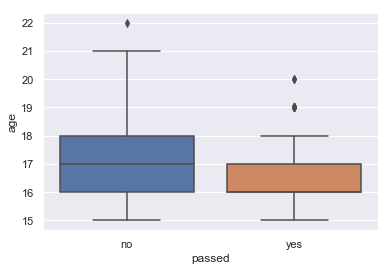

In [40]:
sns.boxplot(x="passed", y="age", data=input_data);

from boxplot, it is very clear that older student are more likely to fail. So i is important variable

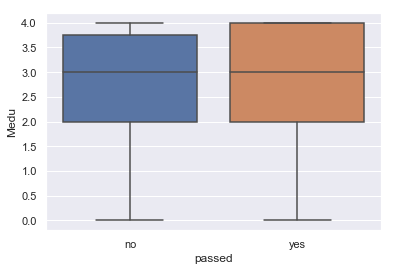

In [41]:
sns.boxplot(x="passed", y="Medu", data=input_data);

from boxplot, it is very clear that mothers education is not important

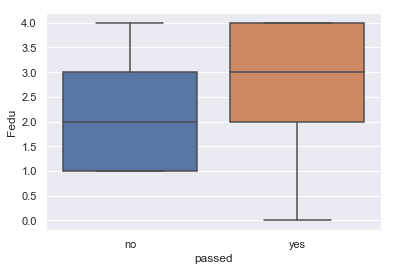

In [43]:
sns.boxplot(x="passed", y="Fedu", data=input_data);

from boxplot, it is very clear that fathers education is important

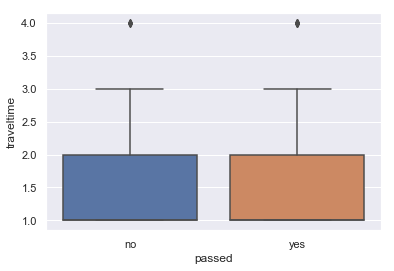

In [45]:
sns.boxplot(x="passed", y="traveltime", data=input_data);

from boxplot, it is very clear that traveltime for education is not important

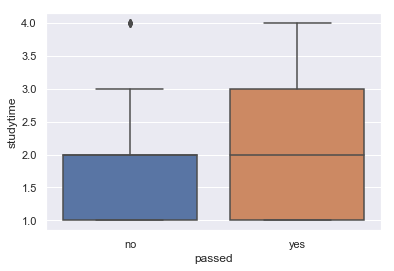

In [46]:
sns.boxplot(x="passed", y="studytime", data=input_data);

from boxplot, it is very clear that studytimee for education is  important

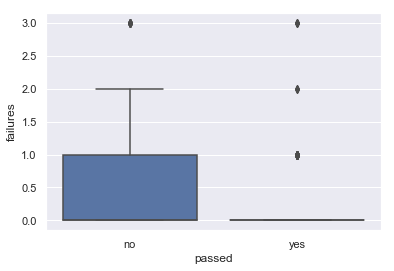

In [47]:
sns.boxplot(x="passed", y="failures", data=input_data);

from boxplot, it is very clear that failures is  important

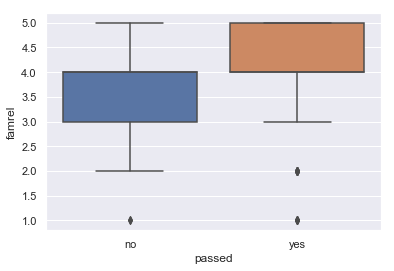

In [48]:
sns.boxplot(x="passed", y="famrel", data=input_data);


from boxplot, it is very clear that family relation is  important

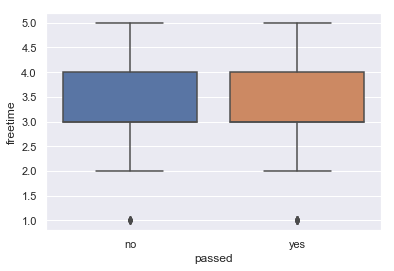

In [49]:
sns.boxplot(x="passed", y="freetime", data=input_data);

from boxplot, it is very clear that free time is not important

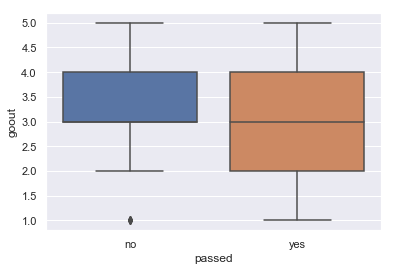

In [50]:
sns.boxplot(x="passed", y="goout", data=input_data);


from boxplot, it is very clear that goout might be important

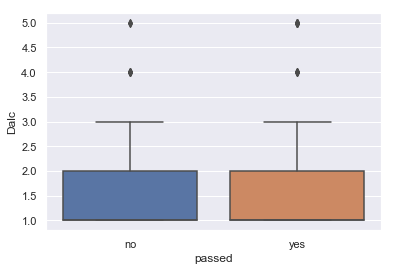

In [52]:
sns.boxplot(x="passed", y="Dalc", data=input_data);

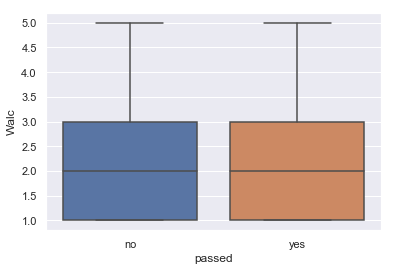

In [53]:
sns.boxplot(x="passed", y="Walc", data=input_data);


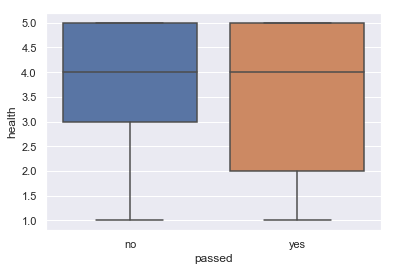

In [54]:
sns.boxplot(x="passed", y="health", data=input_data);


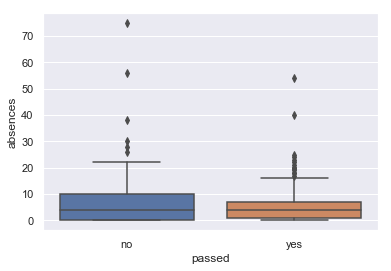

In [55]:
sns.boxplot(x="passed", y="absences", data=input_data);

In [9]:
from statsmodels.stats.outliers_influence import variance_inflation_factor    

def calculate_vif_(X, thresh=5.0):
    variables = list(range(X.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        vif = [variance_inflation_factor(X.iloc[:, variables].values, ix)
               for ix in range(X.iloc[:, variables].shape[1])]

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + X.iloc[:, variables].columns[maxloc] +
                  '\' at index: ' + str(maxloc))
            del variables[maxloc]
            dropped = True

    print('Remaining variables:')
    print(X.columns[variables])
    return X.iloc[:, variables]

In [10]:
num_df = list(input_data._get_numeric_data().columns)
num_df

['age',
 'Medu',
 'Fedu',
 'traveltime',
 'studytime',
 'failures',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences']

In [11]:
calculate_vif_(input_data[num_df], thresh=10.0)

dropping 'age' at index: 0
dropping 'famrel' at index: 5
dropping 'Medu' at index: 0
dropping 'goout' at index: 5
Remaining variables:
Index(['Fedu', 'traveltime', 'studytime', 'failures', 'freetime', 'Dalc',
       'Walc', 'health', 'absences'],
      dtype='object')


,Fedu,traveltime,studytime,failures,freetime,Dalc,Walc,health,absences
0,4,2,2,0,3,1,1,3,6
1,1,1,2,0,3,1,1,3,4
2,1,1,2,3,3,2,3,3,10
3,2,1,3,0,2,1,1,5,2
4,3,1,2,0,3,1,2,5,4
5,3,1,2,0,4,1,2,5,10
6,2,1,2,0,4,1,1,3,0
7,4,2,2,0,1,1,1,1,6
8,2,1,2,0,2,1,1,1,0
9,4,1,2,0,5,1,1,5,0


In [14]:
input_data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'passed'],
      dtype='object')

In [17]:
from scipy import stats
stats.ttest_ind(input_data.loc[input_data['passed']=='yes','traveltime'],
                input_data.loc[input_data['passed']=='no','traveltime'])

Ttest_indResult(statistic=-0.8819888288401103, pvalue=0.37832197080766694)

In [61]:
#selected continous variables
con_vars= ['age',"goout","famrel","failures","studytime","Fedu"]

# Model Building

In [77]:
from sklearn.model_selection import train_test_split
#random split for  train data(90%) and test(10%)
train_data, test_data = train_test_split(input_data, test_size=0.2, random_state=31)
print("Total Training Observations:", len(train_data), "\nTotal  Test Observations:",len(test_data))

Total Training Observations: 316 
Total  Test Observations: 79


In [78]:
print(train_data['passed'].value_counts())
print(test_data['passed'].value_counts())

yes    214
no     102
Name: passed, dtype: int64
yes    51
no     28
Name: passed, dtype: int64


In [79]:
X_train = train_data[con_vars] 

#Create dummy variables
#That is variables with only two values, zero and one.
print(cat_vars)
for var in cat_vars:
    cat_list = pd.get_dummies(train_data[var], prefix=var)
    X_train= X_train.join(cat_list)
Y_train= train_data['passed']

['sex', 'Fjob', 'guardian', 'schoolsup', 'paid', 'higher', 'romantic']


In [80]:
X_train.head()

,age,goout,famrel,failures,studytime,Fedu,sex_F,sex_M,Fjob_at_home,Fjob_health,...,guardian_mother,guardian_other,schoolsup_no,schoolsup_yes,paid_no,paid_yes,higher_no,higher_yes,romantic_no,romantic_yes
366,18,2,4,0,3,4,0,1,0,0,...,1,0,1,0,0,1,0,1,0,1
318,17,4,4,0,3,4,1,0,0,0,...,0,0,1,0,0,1,0,1,1,0
100,16,5,4,0,1,4,0,1,0,0,...,1,0,0,1,0,1,0,1,1,0
352,18,3,4,1,1,3,0,1,0,0,...,1,0,1,0,1,0,1,0,0,1
59,16,3,4,0,2,2,1,0,0,0,...,1,0,1,0,1,0,0,1,1,0


In [81]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [82]:
train_data= pd.concat([train_data.reset_index(drop=True), 
                        pd.DataFrame(logisticRegr.predict_proba(X_train), columns='Prob_'+logisticRegr.classes_)],axis=1)

In [83]:
train_data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'passed', 'Prob_no', 'Prob_yes'],
      dtype='object')

In [84]:
train_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,passed,Prob_no,Prob_yes
0,MS,M,18,U,LE3,T,4,4,teacher,services,...,4,2,2,2,2,5,0,yes,0.179711,0.820289
1,GP,F,17,R,GT3,T,3,4,at_home,services,...,4,3,4,2,5,5,0,yes,0.237262,0.762738
2,GP,M,16,U,GT3,T,4,4,services,services,...,4,5,5,5,5,4,14,no,0.525445,0.474555
3,MS,M,18,U,LE3,T,1,3,at_home,services,...,4,3,3,2,3,3,7,no,0.735838,0.264162
4,GP,F,16,U,GT3,T,4,2,services,other,...,4,2,3,1,1,5,2,yes,0.243543,0.756457


C:\Users\hag5kor\AppData\Local\Continuum\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


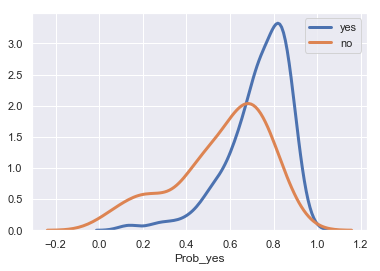

In [85]:
# Iterate through the defaults
for passed in train_data['passed'].unique():
    # Subset to the airline
    subset = train_data[train_data['passed'] == passed]
    
    # Draw the density plot
    sns.distplot(subset['Prob_yes'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
              label = passed )

In [88]:
train_data['pred_passed']= "no"
train_data.loc[train_data['Prob_yes']>0.65,'pred_passed']= "yes"

In [89]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(train_data['passed'], train_data['pred_passed'])
print(confusion_matrix)

[[ 58  44]
 [ 50 164]]


In [90]:
from sklearn.metrics import classification_report
print(classification_report(train_data['passed'], train_data['pred_passed']))

             precision    recall  f1-score   support

         no       0.54      0.57      0.55       102
        yes       0.79      0.77      0.78       214

avg / total       0.71      0.70      0.70       316



In [91]:
from sklearn import metrics
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(train_data['passed'], train_data['pred_passed']))

The accuracy of the Logistic Regression is 0.7025316455696202


# performance measurement on test data

In [93]:
X_test = test_data[con_vars] 

#Create dummy variables
#That is variables with only two values, zero and one.
print(cat_vars)
for var in cat_vars:
    cat_list = pd.get_dummies(test_data[var], prefix=var)
    X_test= X_test.join(cat_list)

['sex', 'Fjob', 'guardian', 'schoolsup', 'paid', 'higher', 'romantic']


In [94]:
test_data= pd.concat([test_data.reset_index(drop=True), 
                         pd.DataFrame(logisticRegr.predict_proba(X_test), 
                                      columns='Prob_'+logisticRegr.classes_)],axis=1)

In [95]:
test_data['pred_passed']= "no"
test_data.loc[test_data['Prob_yes']>0.65,'pred_passed']= "yes"

In [99]:
test_data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'passed', 'Prob_no', 'Prob_yes',
       'pred_passed'],
      dtype='object')

In [101]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test_data['passed'], test_data['pred_passed'])
print(confusion_matrix)

[[17 11]
 [14 37]]


In [102]:
from sklearn.metrics import classification_report
print(classification_report(test_data['passed'], test_data['pred_passed']))

             precision    recall  f1-score   support

         no       0.55      0.61      0.58        28
        yes       0.77      0.73      0.75        51

avg / total       0.69      0.68      0.69        79



In [103]:
from sklearn import metrics
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(test_data['passed'], test_data['pred_passed']))

The accuracy of the Logistic Regression is 0.6835443037974683


In [105]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(X_train, Y_train)
prediction=model.predict(X_test)
test_Y= test_data['passed']
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction,test_Y))

The accuracy of the Decision Tree is 0.5822784810126582


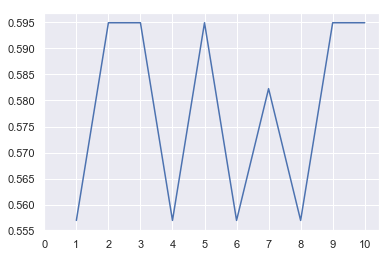

Accuracies for different values of n are: [0.55696203 0.59493671 0.59493671 0.55696203 0.59493671 0.55696203
 0.58227848 0.55696203 0.59493671 0.59493671]


In [107]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
a_index=list(range(1,11))
a=pd.Series()
x=[0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(X_train, Y_train)
    prediction=model.predict(X_test)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,test_Y)))
plt.plot(a_index, a)
plt.xticks(x)
plt.show()
print('Accuracies for different values of n are:',a.values)

In [108]:
from sklearn import svm
types=['rbf','linear']
for i in types:
    model=svm.SVC(kernel=i)
    model.fit(X_train, Y_train)
    prediction=model.predict(X_test)
    print('Accuracy for SVM kernel=',i,'is',metrics.accuracy_score(prediction,test_Y))

Accuracy for SVM kernel= rbf is 0.6455696202531646
Accuracy for SVM kernel= linear is 0.7215189873417721


In [109]:
from sklearn.metrics import classification_report
print(classification_report(test_Y,prediction))

             precision    recall  f1-score   support

         no       0.75      0.32      0.45        28
        yes       0.72      0.94      0.81        51

avg / total       0.73      0.72      0.68        79



# With All variables

In [111]:
train_data.dtypes

school           object
sex              object
age               int64
address          object
famsize          object
Pstatus          object
Medu              int64
Fedu              int64
Mjob             object
Fjob             object
reason           object
guardian         object
traveltime        int64
studytime         int64
failures          int64
schoolsup        object
famsup           object
paid             object
activities       object
nursery          object
higher           object
internet         object
romantic         object
famrel            int64
freetime          int64
goout             int64
Dalc              int64
Walc              int64
health            int64
absences          int64
passed           object
Prob_no         float64
Prob_yes        float64
pred_passed      object
pred_default     object
dtype: object

In [112]:
con_vars=['age','Medu','Fedu','traveltime','studytime','failures','famrel','freetime',
         'goout','Dalc','Walc','health','absences']
cat_vars=['school','sex','address','famsize','Pstatus','Mjob','Fjob','reason','guardian',
          'schoolsup','famsup','paid','activities','nursery','higher','internet','romantic']

In [113]:
X_train = train_data[con_vars] 

#Create dummy variables
#That is variables with only two values, zero and one.
print(cat_vars)
for var in cat_vars:
    cat_list = pd.get_dummies(train_data[var], prefix=var)
    X_train= X_train.join(cat_list)
Y_train= train_data['passed']

['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']


In [115]:
X_test = test_data[con_vars] 

#Create dummy variables
#That is variables with only two values, zero and one.
print(cat_vars)
for var in cat_vars:
    cat_list = pd.get_dummies(test_data[var], prefix=var)
    X_test= X_test.join(cat_list)

['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']


In [116]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(X_train, Y_train)
prediction=model.predict(X_test)
test_Y= test_data['passed']
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction,test_Y))

The accuracy of the Decision Tree is 0.5316455696202531


In [117]:
pd.Series(model.feature_importances_,X_train.columns).sort_values()

Mjob_teacher         0.000000
schoolsup_no         0.000000
guardian_mother      0.000000
reason_other         0.000000
reason_home          0.000000
Fjob_teacher         0.000000
Fjob_services        0.000000
Fjob_health          0.000000
Mjob_health          0.000000
Pstatus_T            0.000000
famsize_LE3          0.000000
address_R            0.000000
sex_F                0.000000
Pstatus_A            0.000000
famsup_no            0.000000
paid_no              0.000000
internet_no          0.000000
higher_yes           0.000000
higher_no            0.000000
nursery_yes          0.000000
school_GP            0.000000
nursery_no           0.005638
Mjob_other           0.005791
activities_yes       0.007238
address_U            0.007301
activities_no        0.008686
school_MS            0.009651
internet_yes         0.010153
sex_M                0.010269
paid_yes             0.010858
Medu                 0.010858
famsup_yes           0.011136
Mjob_services        0.013512
guardian_f